# 3. 벡터의 응용 (데이터 분석에서의 벡터)

해당 section에서는 LinearAlgebra의 핵심 개념인 vector의 dot-product, norm, broadcasting 기법이 어떻게 ML 분야에서 사용되는

피어슨 상관관계 분석(Correlation coefficient), 코사인 유사도(Cosine Similarity), 시계열 필터링(Time Series Filtering), K-평균 클러스터링(K-mean Clustering)

등과 같은 기법들에 어떻게 적용되는지에 대해서 집중한다.

In [1]:
# 필요 라이브러리 호출
import numpy as np
import matplotlib.pyplot as plt

# 그래프 전역 설정
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
plt.rcParams.update({'font.size':14})

## 1)  상관관계 분석 - 상관계수 값에 따른 그래프의 변화 확인

피어슨 상관계수 공식을 기반으로 두 변수 사이의 선형 관계를 정량화하여 나타는 상관관계 분석에서의 상관계수 값을 기반으로 -1 ~ +1 까지의 값으로 값이 나오면  

- -1 : 완벽한 음의 관계
- 0 : 선형 관계 없음
- +1 : 완벽한 양의 관계

로 구분이 가능하며 각 상관계수 값에 따라 어떤 그래프를 나타내는지 하단의 코드를 활용하여 확인이 가능하다

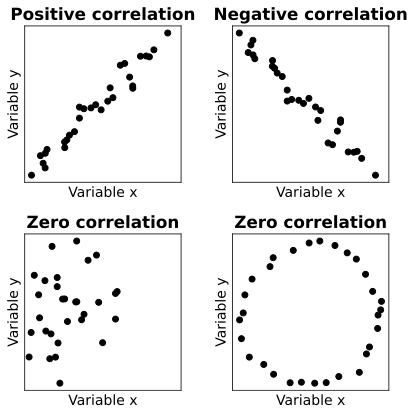

In [6]:
N = 30

# 랜덤 상관계수
x = np.linspace(0,10,N) + np.random.randn(N)
y = x + np.random.randn(N)

# 그래프 설정 (총 4개)
_,axs = plt.subplots(2,2,figsize=(6,6))

# 상관계수 +1 (양의 상관관계의 경우)
axs[0,0].plot(x,y,'ko')
axs[0,0].set_title('Positive correlation',fontweight='bold')
axs[0,0].set_xlabel('Variable x')
axs[0,0].set_ylabel('Variable y')
axs[0,0].set_xticks([])
axs[0,0].set_yticks([])
axs[0,0].axis('square')

# 상관계수 -1 (음의 상관관계의 경우)
axs[0,1].plot(x,-y,'ko')
axs[0,1].set_title('Negative correlation',fontweight='bold')
axs[0,1].set_xlabel('Variable x')
axs[0,1].set_ylabel('Variable y')
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])
axs[0,1].axis('square')

# 상관계수 0 (0의 상관계수의 경우 - 1)
axs[1,0].plot(np.random.randn(N),np.random.randn(N),'ko')
axs[1,0].set_title('Zero correlation',fontweight='bold')
axs[1,0].set_xlabel('Variable x')
axs[1,0].set_ylabel('Variable y')
axs[1,0].set_xticks([])
axs[1,0].set_yticks([])
axs[1,0].axis('square')

# 상관계수 0 (0의 상관계수의 경우 - 2)
x = np.cos(np.linspace(0,2*np.pi,N)) + np.random.randn(N)/20
y = np.sin(np.linspace(0,2*np.pi,N)) + np.random.randn(N)/20
axs[1,1].plot(x,y,'ko')
axs[1,1].set_title('Zero correlation',fontweight='bold')
axs[1,1].set_xlabel('Variable x')
axs[1,1].set_ylabel('Variable y')
axs[1,1].set_xticks([])
axs[1,1].set_yticks([])
axs[1,1].axis('square')

plt.tight_layout()
plt.savefig('Figure_03_01.png',dpi=300) # 파일에 그래프 저장
plt.show()

In [ ]:
### Note: The code for k-means is in Exercise 7 below.

# Exercise 1 : 상관관계와 코사인 유사도 분석 (Correlation Coefficient & Cosine Similarity)

In [8]:
# 함수 생성
def corrAndCosine(x,y):

# 각각, 코사인 유사도 분석 수식과 피어슨 상관계수 수식을 활용하여 하단의 코드를 작성함
  # 코사인 유사도 분석
  num = np.dot(x,y) # 분자
  den = np.linalg.norm(x) * np.linalg.norm(y) # 분모
  cos = num / den

  # 상관관계 분석
  xm  = x-np.mean(x)
  ym  = y-np.mean(y)
  num = np.dot(xm,ym) # 분자
  den = np.linalg.norm(xm) * np.linalg.norm(ym) # 분모
  cor = num / den

  return cor,cos #코사인 유사도 분석값, 상관관계 분석값 반환


# 랜덤 데이터 a, b를 생성
a = np.random.randn(15)
b = np.random.randn(15)

# a와 b 사이의 상관관계와 코사인 유사도 분석을 진행
r,c = corrAndCosine(a,b)

# 코사인 유사도 분석과 상관관계 분석 수식의 결과가 차이가 있는지를 확인
print(r,np.corrcoef(a,b)[0,1])

-0.15681351143957004 -0.15681351143956998


In [13]:
# 평균 중심화 없이 생성한 데이터
a = np.random.randn(15) + 10 # note the offset!
b = np.random.randn(15)

# 평균 중심화를 적용하여 생성한 데이터
aNoMean = a - np.mean(a)
bNoMean = b - np.mean(b)


# 평균 중심화가 얼마나 중요한지 확인 (값의 차이)
print('Without mean-centering (should differ):')
print( np.round(corrAndCosine(a,b),4) ) #평균 중심화를 적용하지 않은 경우에는 코사인 유사도 분석과 상관관계 분석의 값이 차이가 남
print(' ')

print('With mean-centering (should be the same):')
print( np.round(corrAndCosine(aNoMean,bNoMean),4) ) #평균 중심화를 적용한 경우에는 코사인 유사도 분석 결과와 상관관계 분석 결과값이 일치함

Without mean-centering (should differ):
[0.5815 0.2158]
 
With mean-centering (should be the same):
[0.5815 0.5815]


## Exercise 2 : 평균중심화가 상관관계와 코사인 유사도에 주는 영향 확인

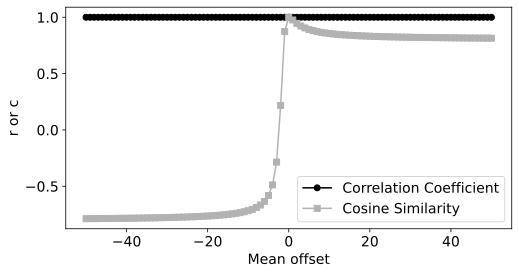

In [20]:
# 변수 생성 (-50 ~ +50까지 중심을 변경하도록 offset)
a = np.arange(4,dtype=float) #실수로 값 생성
offsets = np.arange(-50,51)

# 결과값 저장할 변수 초기화
results = np.zeros((len(offsets),2))

# for루프를 offsets 만큼 변경하며 계산된 상관관계와 코사인 유사도의 결과값을 results에 저장
for i in range(len(offsets)):
    results[i,:] = corrAndCosine(a,a+offsets[i])


# 결과를 그래프로 표기
plt.figure(figsize=(8,4))
h = plt.plot(offsets,results)
h[0].set_color('k')
h[0].set_marker('o')
h[1].set_color([.7,.7,.7])
h[1].set_marker('s')

plt.xlabel('Mean offset')
plt.ylabel('r or c')
plt.legend(['Correlation Coefficient','Cosine Similarity'])
plt.savefig('Figure_03_02.png',dpi=300)
plt.show()

## Exercise 3 : 피어슨 상관관계 분석 함수 기능 확인

위에서 구현한 상관계수 함수와는 달리 SciPy 라이브러리의 stats 모듈 내부에 pearsonr 함수를 통해 피어슨 상관관계 분석이 가능하다.

In [24]:
# 함수 호출 (피어슨 상관관계 분석 함수)
from scipy.stats import pearsonr

# 피어슨 상관관계 분석 함수 내부 확인
??pearsonr

Signature: pearsonr(x, y, *, alternative='two-sided', method=None, axis=0)
Docstring:
Pearson correlation coefficient and p-value for testing non-correlation.

The Pearson correlation coefficient [1]_ measures the linear relationship
between two datasets. Like other correlation
coefficients, this one varies between -1 and +1 with 0 implying no
correlation. Correlations of -1 or +1 imply an exact linear relationship.
Positive correlations imply that as x increases, so does y. Negative
correlations imply that as x increases, y decreases.

This function also performs a test of the null hypothesis that the
distributions underlying the samples are uncorrelated and normally
distributed. (See Kowalski [3]_
for a discussion of the effects of non-normality of the input on the
distribution of the correlation coefficient.)
The p-value roughly indicates the probability of an uncorrelated system
producing datasets that have a Pearson correlation at least as extreme
as the one computed from these da

## Exercise 4 : 새로 구현한 상관관계 분석 함수와 SciPy 라이브러리 Stats 모듈의 pearsonr 함수의 계산 시간 비교

각 함수의 계산 소요 시간을 확인해보면 pearsonr 함수의 실행 속도보다 rho(직접 선언한 함수)가 더 빠르다는 것을 확인 가능하다.

다만, 벡터의 입력값이 커지면 두 함수의 실행속도의 격차가 좁혀질 것이다.

In [32]:
# 평균중심화를 적용한 상관관계 분석 함수 정의
def rho(x,y):
  xm = x-np.mean(x)
  ym = y-np.mean(y)
  n  = np.dot(xm,ym)
  d  = np.linalg.norm(xm) * np.linalg.norm(ym)
  return n/d


# 시간 측정을 위해 time 라이브러리 호출
import time

# 실험 파라미터 값을 지정
numIters  = 1000
varLength =  500

# rho() 함수의 시간 측정
tic = time.time()
for i in range(numIters):
  x = np.random.randn(varLength,2)
  rho(x[:,0],x[:,1])
t1 = time.time() - tic


# pearsonr() 함수의 시간 측정
tic = time.time()
for i in range(numIters):
  x = np.random.randn(varLength,2)
  pearsonr(x[:,0],x[:,1])
t2 = time.time() - tic


# 결과를 확인
#밀리초 단위로 출력되기 때문에 1000을 곱해서 확인
print(f'My function took {t1*1000:.2f} ms')
print(f'   pearsonr took {t2*1000:.2f} ms')

My function took 33.10 ms
   pearsonr took 94.30 ms


# Exercise 5 : 시계열 필터링과 특징 탐지 (Time Series Filtering)

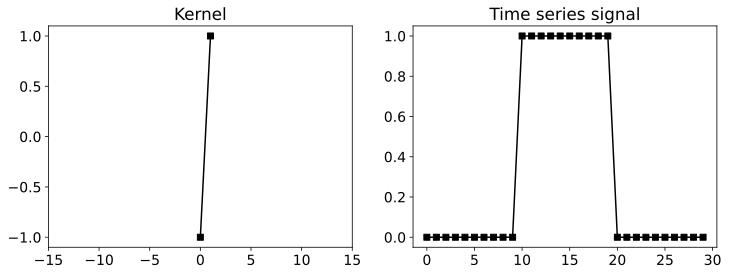

In [38]:
# 에지 검출기 생성

# 커널은 -1 ~ 1로 생성
kernel = np.array([-1,1])

signal = np.zeros(30) # 모든 신호의 값을 0으로 초기화
signal[10:20] = 1 # 신호가 10 ~ 20 사이에서 1로 나타나도록 생성


# 그래프를 표기
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-15,15])

axs[1].plot(signal,'ks-')
axs[1].set_title('Time series signal')

plt.savefig('Figure_03_04ab.png',dpi=300)
plt.show()

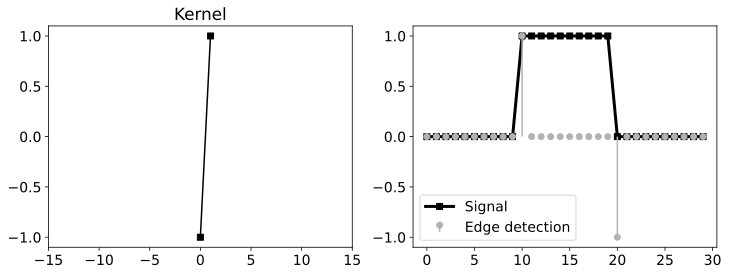

In [43]:
# featureMap의 신호를 모두 0으로 signal과 같은 길이로 초기화 진행
featureMap = np.zeros(len(signal))

# 각 시점에서 커널과 길이가 같은 시계열 데이터와 커널 사이의 내적을 계산
for t in range(1,len(signal)-1):
  featureMap[t] = np.dot(kernel,signal[t-1:t+1])


# 결과를 그래프로 표기
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-15,15])

axs[1].plot(signal,'ks-',label='Signal',linewidth=3)
markers,stemlines,_ = axs[1].stem(range(len(featureMap)),featureMap,
                                  basefmt=' ',linefmt='',markerfmt='o',
                                  label='Edge detection')

plt.setp(stemlines,'color',[.7,.7,.7])
plt.setp(markers,'color',[.7,.7,.7])

axs[1].legend()
plt.savefig('Figure_03_04c.png',dpi=300)
plt.show()

# Exercise 6 : 다른 신호를 이용하여 동일하게 시계열 필터링 및 특징 분석 진행

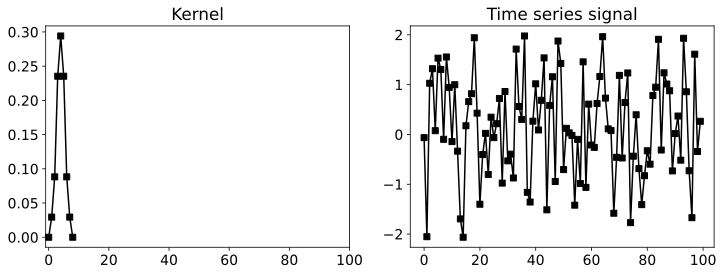

In [47]:
# 가우스 정규 분포에 근사하는 모양으로 커널 정의 (모두의 합이 1이 되도록)
kernel = np.array([0,.1,.3,.8,1,.8,.3,.1,0])
kernel = kernel / np.sum(kernel)

# 적당한 길이의 파라미터 지정
Nkernel = len(kernel)
halfKrn = Nkernel//2


# 가우스 분포에서 생성된 100개의 난수 생성 (신호)
Nsignal = 100
timeseries = np.random.randn(Nsignal)


# 그래프로 표기
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-1,Nsignal])

axs[1].plot(timeseries,'ks-')
axs[1].set_title('Time series signal')

plt.savefig('Figure_03_06ab.png',dpi=300)
plt.show()

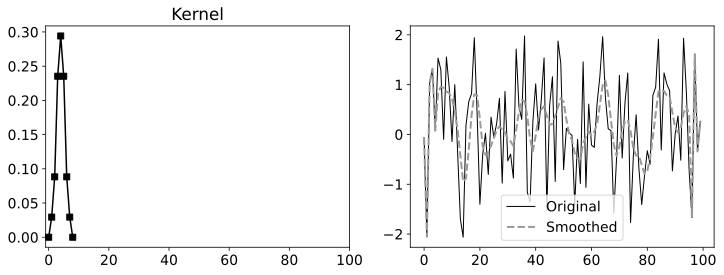

In [49]:
# 필터링을 위해 위에서 생성한 커널과 시계열 데이터를 복사 진행
filtsig = timeseries.copy()

# 시계열을 따라가면서 각 시점의 커널과 길이가 같은 시계열 데이터와의 내적을 계산 진행
for t in range(halfKrn+1,Nsignal-halfKrn):
  filtsig[t] = np.dot(kernel,timeseries[t-halfKrn-1:t+halfKrn])


# 결과값을 그래프로 출력
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'ks-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-1,Nsignal])

axs[1].plot(timeseries,color='k',label='Original',linewidth=1)
axs[1].plot(filtsig,'--',color=[.6,.6,.6],label='Smoothed',linewidth=2)
axs[1].legend()

plt.savefig('Figure_03_06c.png',dpi=300)
plt.show()

기존의 시계열 데이터 그래프와는 달리 조금 더 평평하게 그려진 그래프가 바로 가우스 커널로 내적을 통해 필터링된 신호로 저주파(low-pass) 필터링이라고 칭하기도 한다.

# Exercise 7 : 커널의 중앙 1 -> -1로 변경 후 중앙 평균화 진행 결과 확인

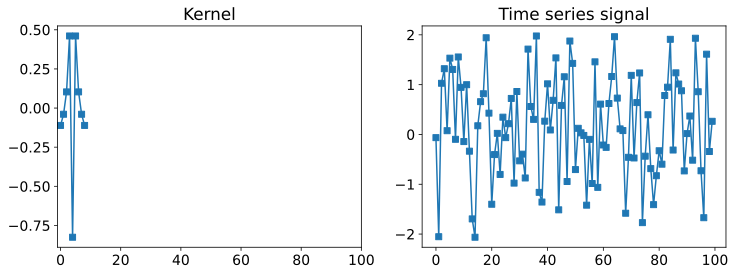

In [52]:
# 기존의 커널
# kernel = np.array([0,.1,.3,.8,1,.8,.3,.1,0])
# kernel = kernel / np.sum(kernel)

kernel = np.array([0,.1,.3,.8,-1,.8,.3,.1,0]) # 커널의 중앙을 1 -> -1로 변경
kernel /= np.sum(kernel)
kernel -= np.mean(kernel) # 중앙 평균화 진행

# 그래프로 결과 확인
_,axs = plt.subplots(1,2,figsize=(12,4))
axs[0].plot(kernel,'s-')
axs[0].set_title('Kernel')
axs[0].set_xlim([-1,Nsignal])

axs[1].plot(timeseries,'s-')
axs[1].set_title('Time series signal')
plt.show()

커널의 형태를 바꿔서 중앙을 1에서 -1로 바꾸고 중앙평균화를 진행하면 그래프도 변한다

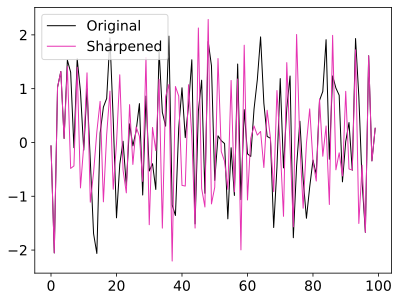

In [54]:
filtsig2 = timeseries.copy() # 시계열 데이터 복사
for t in range(halfKrn+1,Nsignal-halfKrn): #동일하게 시계열 필터링 및 특징 분석 진행
  filtsig2[t] = np.dot(kernel,timeseries[t-halfKrn-1:t+halfKrn]) #커널과 시계열 데이터 사이의 내적 계산

# 결과 그래프로 표기
plt.plot(timeseries,color='k',label='Original',linewidth=1)
plt.plot(filtsig2,color=[.9,.2,.7],label='Sharpened',linewidth=1)
plt.legend()
plt.show()

저주파 필터링과는 달리 고주파 필터링을 사용한 결과로는 기존의 시계열 데이터보다 더 날카로운 형태의 그래프를 보여주는 것을 확인 가능하다.

이런 종류의 커널은 부드러운(낮은 주파수) 특징을 감쇄하고 빠른 변화 즉 높은 주파수의 특징을 강조하는 고주파(high-pass) 필터라고 부른다.

# Exercise 8 : K-평균 클러스터링

K-mean Clustering 기법은 그룹 중심까지의 거리를 최소화하도록 다변량 데이터를 상대적으로 적은 k수의 그룹 또는 범주로 분류하는 비지도 기법이다.

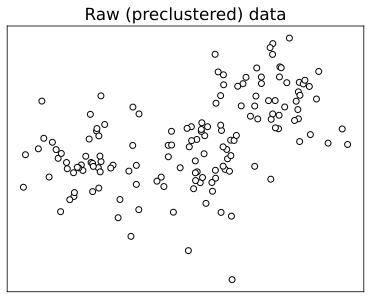

In [79]:
# 데이터 생성
nPerClust = 50 #클러스터 당 데이터 개수 50으로 지정
blur = 1 # 데이터의 퍼짐 정도 지정 (표준편차)

# K=3 으로 지정
A = [  1, 1 ]
B = [ -3, 1 ]
C = [  3, 3 ]

# 무작위 데이터를 생성 (각 K값 주변으로)
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# matrix로 연결
data = np.transpose( np.concatenate((a,b,c),axis=1) ) # 2.50 -> 2,150(concatenate) -> 150,2(transpose)

# 데이터를 그래프로 표기
plt.plot(data[:,0],data[:,1],'ko',markerfacecolor='w')
plt.title('Raw (preclustered) data')
plt.xticks([])
plt.yticks([])

plt.show()

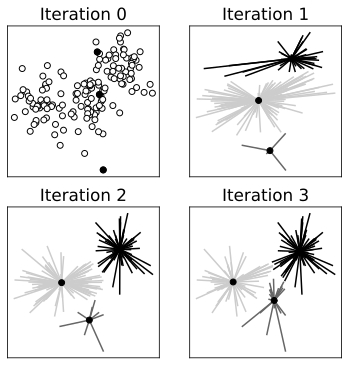

In [80]:
# 무작위 클러스터 중심점 초기화
k = 3

# 랜덤 클러스터 중심 생성
ridx = np.random.choice(range(len(data)),k,replace=False)
centroids = data[ridx,:]

# 그래프 크기 설정
fig,axs = plt.subplots(2,2,figsize=(6,6))
axs = axs.flatten()
lineColors = [ [0,0,0],[.4,.4,.4],[.8,.8,.8] ]#'rbm'

# 그래프에 데이터들을 표기
axs[0].plot(data[:,0],data[:,1],'ko',markerfacecolor='w')
axs[0].plot(centroids[:,0],centroids[:,1],'ko')
axs[0].set_title('Iteration 0')
axs[0].set_xticks([])
axs[0].set_yticks([])



# 각자 다른 렌덤 데이터값을 통해서 무작위 클러스터 분류 반복 진행
for iteri in range(3):
    
  # 1) 거리 계산
  dists = np.zeros((data.shape[0],k))
  for ci in range(k):
    dists[:,ci] = np.sum((data-centroids[ci,:])**2,axis=1)
        
  # 2) 최소 거리에 기반하여 그룹을 할당함
  groupidx = np.argmin(dists,axis=1)
    
  # 3) 클러스터 중심 다시 계산
  for ki in range(k):
    centroids[ki,:] = [ np.mean(data[groupidx==ki,0]), np.mean(data[groupidx==ki,1]) ]
  

  # 데이터를 그래프에 표기
  for i in range(len(data)):
    axs[iteri+1].plot([ data[i,0],centroids[groupidx[i],0] ],[ data[i,1],centroids[groupidx[i],1] ],color=lineColors[groupidx[i]])
  axs[iteri+1].plot(centroids[:,0],centroids[:,1],'ko')
  axs[iteri+1].set_title(f'Iteration {iteri+1}')
  axs[iteri+1].set_xticks([])
  axs[iteri+1].set_yticks([])


plt.savefig('Figure_03_03.png',dpi=300)
plt.show()